In [149]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List#
import seaborn as sns

In [54]:
delta_t: float = 0.01
steps: int = int(15/0.01)
x_0: int = 2
number_mc_samples: int = 10000

In [55]:
def sample_loss():
    return np.random.normal(0, 1)

def step(x_n : float) -> float:
    x_next: float = x_n - (delta_t * x_n) + np.sqrt(2*delta_t) * sample_loss()
    return x_next

vectorized_step: callable = np.vectorize(step)

In [56]:
trajectory: np.array = np.zeros((number_mc_samples, steps))
trajectory.shape

(10000, 1500)

In [57]:
trajectory[:, 0] = x_0

for step in range(1, steps):
    trajectory[:, step] = vectorized_step(trajectory[:, step-1])

In [58]:
step_0 = trajectory[:, 0]
step_05 = trajectory[:, int(0.5/0.01)]
step_1 = trajectory[:, int(1/0.01)]
step_10 = trajectory[:, int(10/0.01)]
step_15 = trajectory[:, int(15/0.01) - 1]

(array([  24.,  158.,  668., 1832., 2822., 2476., 1446.,  481.,   85.,
           8.]),
 array([-3.56635089, -2.82976078, -2.09317068, -1.35658057, -0.61999047,
         0.11659964,  0.85318974,  1.58977985,  2.32636995,  3.06296006,
         3.79955016]),
 <BarContainer object of 10 artists>)

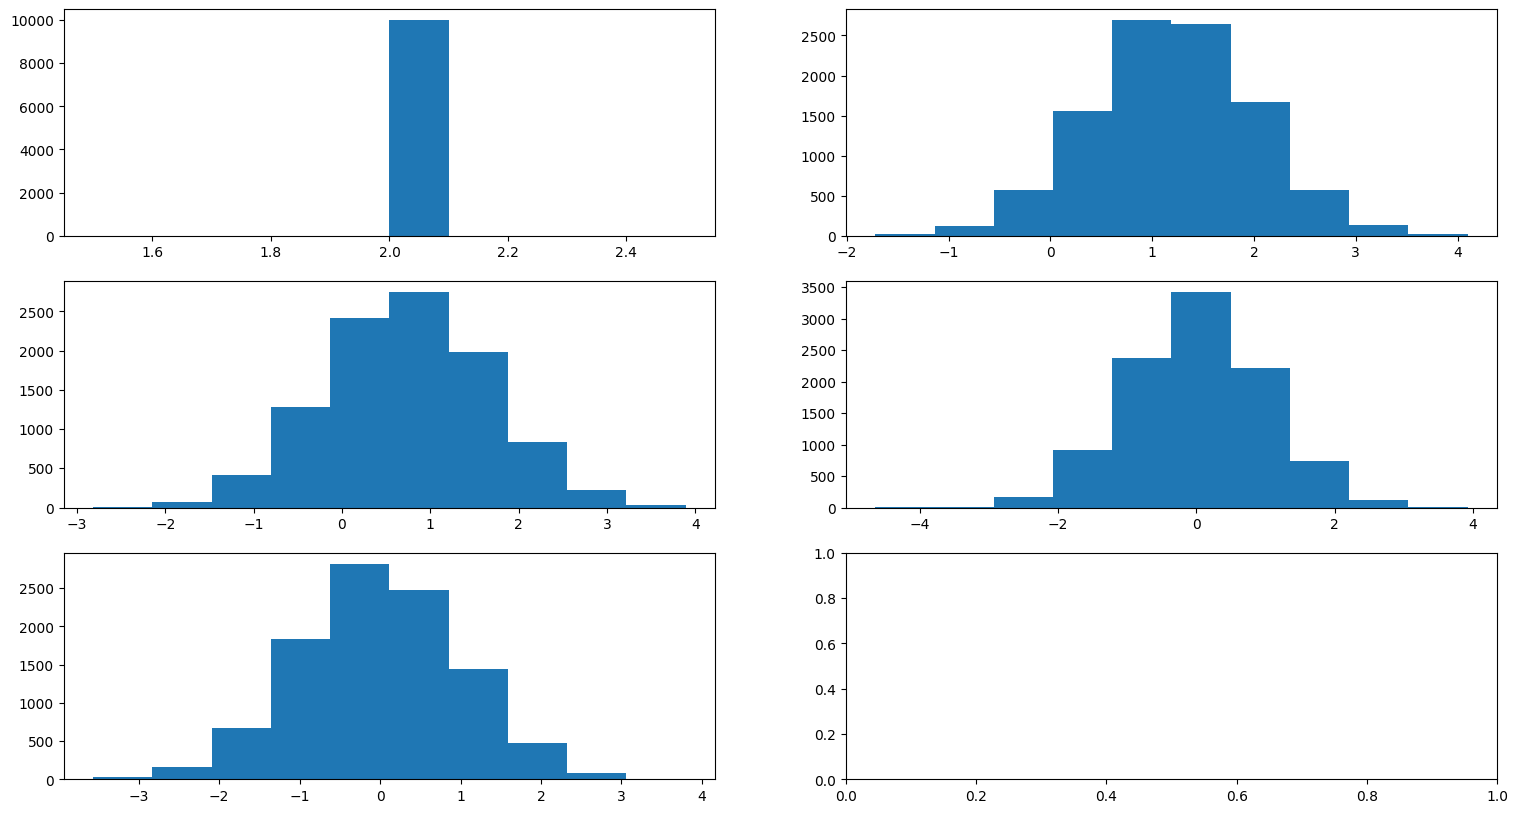

In [59]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(18.5, 10)
axs[0][0].hist(step_0)
axs[0][1].hist(step_05)
axs[1][0].hist(step_1)
axs[1][1].hist(step_10)
axs[2][0].hist(step_15)

In [60]:
# the mean seams to converge towards 0 and the shape looks like a normal distribution with mean 0

# 1.4

running the  Ornstein-Uhlenbec backward would yield a distribution over x_0 that in a forward pass will lead to the distribution we started with when going backwards?

# 2.1

In [87]:
C: int = 1

# the interval will be [0, 1] with 10000 observations
interval: range = range(0, 10000)
interval_length: int = 8

In [88]:
def pi(x) -> float:
    return (1/C) * np.exp(-v(x))

def v(x) -> float:
    return (((x - 4)**2) - 2) ** 2

Text(0.5, 1.0, 'Density')

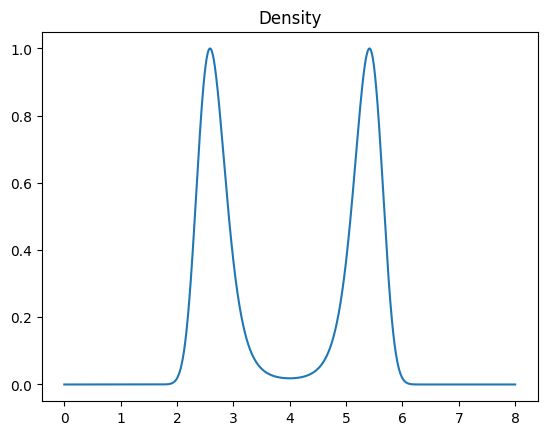

In [92]:
density: List[float] = []
x_axis: List [float] = []

for i in interval:
    x: float = (i/len(interval)) * interval_length
    y: float = pi(x)

    x_axis.append(x)
    density.append(y)

plt.plot(x_axis, density)
plt.title("Density")

# 2.2

In [177]:
T = 100
steps: int = int(T/delta_t)
number_mc_steps2: int = 10000
x_0_2: int = 1
C = 100

In [178]:
trajectory2: np.array = np.zeros((number_mc_steps2, steps), dtype = 'float32')
trajectory2[:, 0] = x_0_2

In [179]:
trajectory2.shape

(10000, 10000)

In [180]:
for i in range(1, steps):
    values: np.array = trajectory2[:, i-1]

    vx: np.array = (4 * (values - 4) ** 3 - 8 * (values - 4)) * delta_t
    errors: np.array = np.sqrt(2 * delta_t) * np.random.normal(0, 1, number_mc_steps2)

    values_new = values - vx + errors
    trajectory2[:, i] =  values_new

In [170]:
def hist_plt(time_points, sim_mat, bins, alp: float):
    num_plots = len(time_points)
    num_rows = int(np.ceil(np.sqrt(num_plots)))
    num_cols = int(np.ceil(num_plots / num_rows))

    # Get a colormap
    cmap = plt.get_cmap('tab10')

    # Get the corresponding colors from the colormap
    colors = [cmap(i % 10) for i in range(len(time_points))]

    # Iterate over the time points and plot histograms
    fig, axs = plt.subplots(num_rows, num_cols,figsize = (20,18))
    axs = axs.ravel()
    for i, t in enumerate(time_points):
        # Get the corresponding index in T
        t_index = int(t / delta_t)
        # Extract the values at the given time point
        if t_index > 0:
            values = sim_mat[:, t_index - 1]
        else:
            values = sim_mat[:, t_index]

        # Plot histogram with the random color
        sns.histplot(values, bins=bins, kde=True, alpha=alp, label=f't = {t}', color=colors[i], ax=axs[i], stat = 'density')

        # Add labels and legend
        axs[i].set(xlabel='Value', ylabel='Frequency')
        axs[i].legend()

    # Plot the normal distribution
    samples = np.random.randn(10000)
    i = len(time_points)
    sns.histplot(samples, bins=bins, kde=True, alpha=alp, label='Normal Distribution', color=cmap(i), ax=axs[i])
    axs[i].set(ylabel='Frequency')
    axs[i].legend()

    plt.tight_layout()
    plt.show()

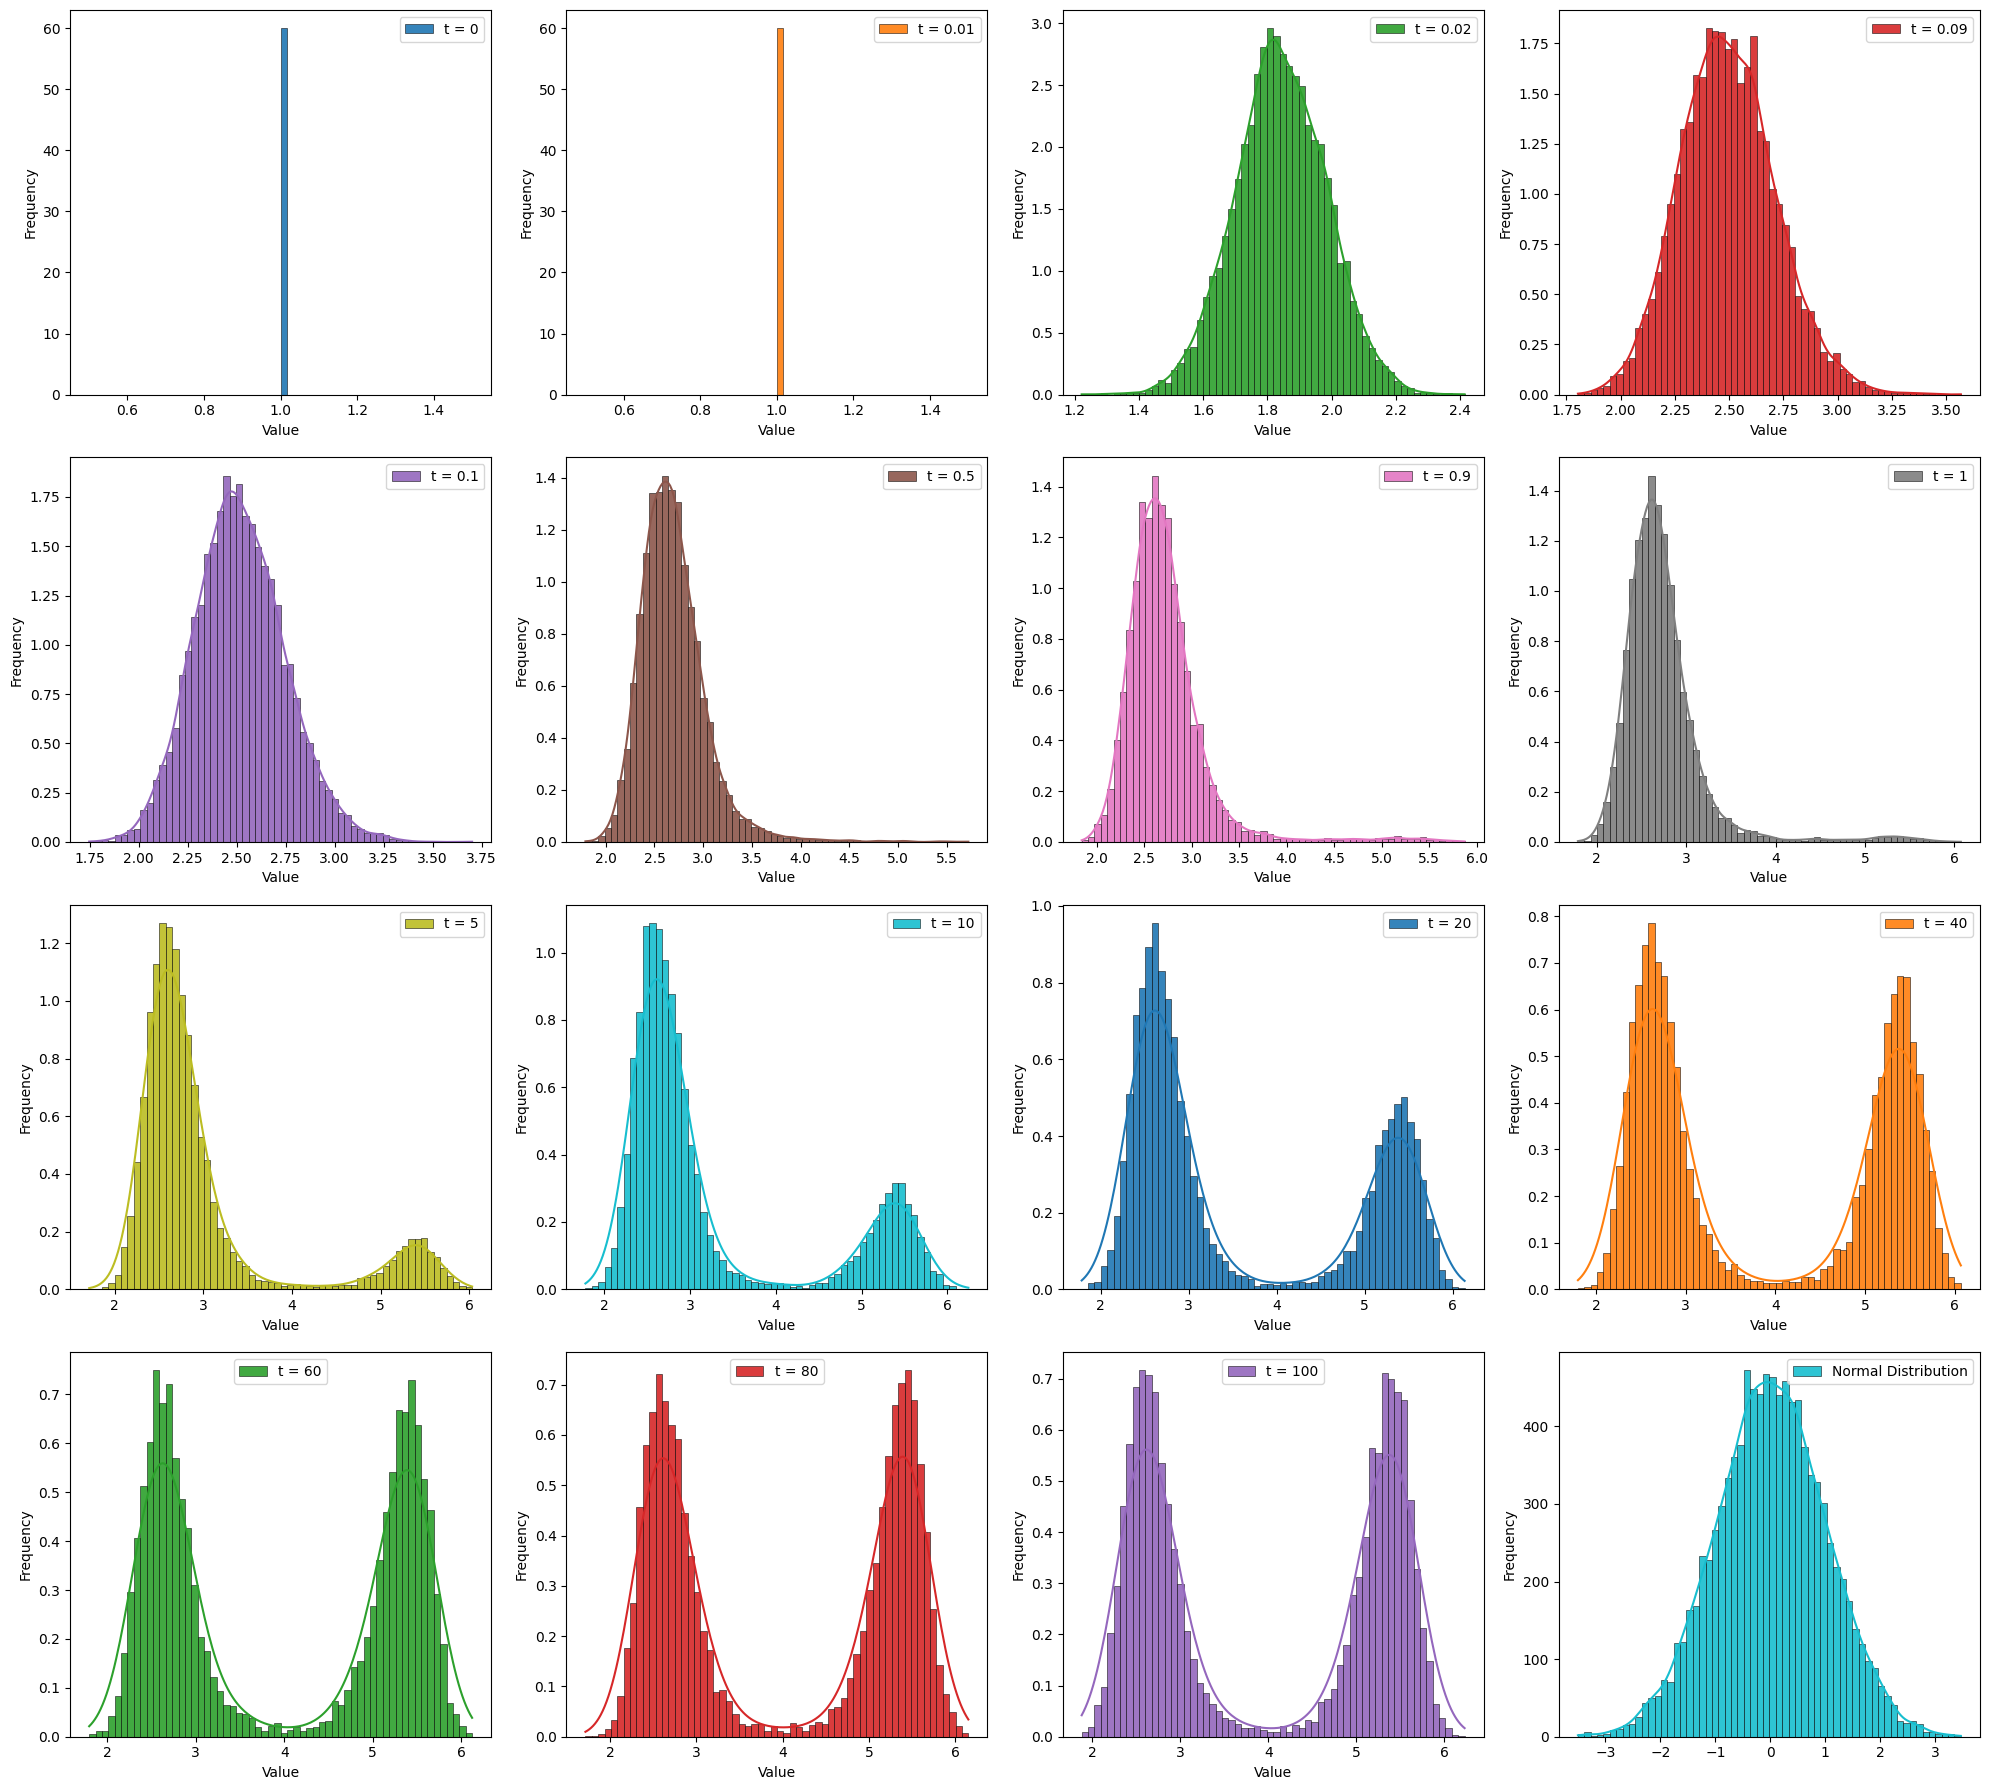

In [181]:
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10,20,40,60,80,100]
hist_plt(time_points, trajectory2, 60, alp=0.9)